In [2]:
# import standard modules
import numpy as np
import cv2, glob, pickle
import image_helper as ih

# import matplotlib modules
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [3]:
# calibrate camera
images = glob.glob('./camera_cal/calibration*.jpg')
ih.calibrate_camera(images)

INFO: Looping through images
....................
Pickle dumped with object and image points!!!


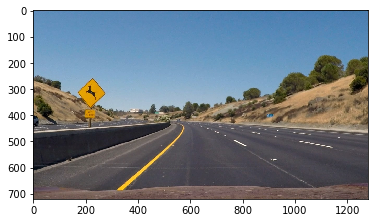

In [4]:
# read a sample image and show
image = mpimg.imread("./test_images/test2.jpg")
plt.imshow(image)

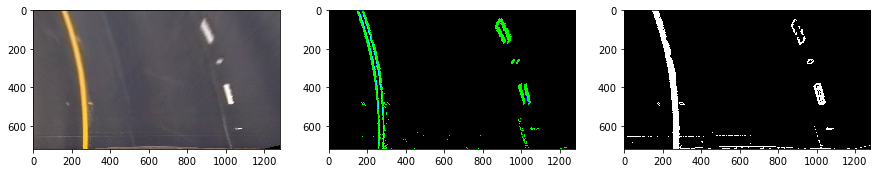

In [4]:
# warp the image after distortion correction
dst = ih.undistort(image)
warped, Minv = ih.warp(dst)

# apply the pipeline threshold build in the course
binary_warped = ih.pipeline(warped, s_thresh=(150,200), sx_thresh=(20,180))

# apply the combined threshold
binary_warped_1 = ih.combined_threshold(warped,sobel_kernel=3
                                   , sobel_threshold_x_min=50, sobel_threshold_x_max=255
                                   , sobel_threshold_y_min=50, sobel_threshold_y_max=255
                                   , mag_threshold_min=20, mag_threshold_max=255
                                   , dir_threshold_min=-np.pi/2, dir_threshold_max=np.pi/2
                                   , col_threshold_min=150, col_threshold_max=255)
plt.figure(figsize=(15,15))
plt.subplot(1,3,1)
plt.imshow(warped)
plt.subplot(1,3,2)
plt.imshow(binary_warped, cmap='gray')
plt.subplot(1,3,3)
plt.imshow(binary_warped_1, cmap='gray')

C:\Users\syed.mateen\Documents\snmateen\technical\data science\udacity\carnd\CarND-Advanced-Lane-Lines-master\image_helper.py:313: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  histogram = np.sum(binary_warped[binary_warped.shape[0]/2:,:], axis=0)


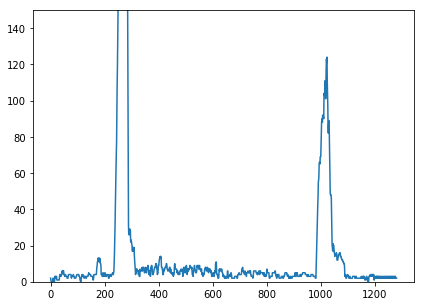

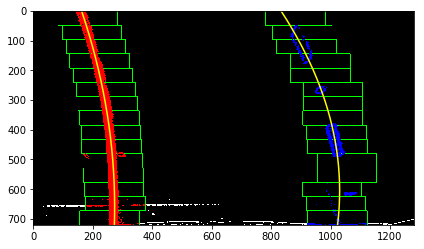

In [5]:
# fit polynomial
left_fitx, right_fitx, ploty = ih.fit_polynomial(binary_warped=binary_warped_1, nwindows=15, plotit=True)

In [6]:
left_rad, right_rad, offset = ih.calculate_curvature(binary_warped, left_fitx, right_fitx, ploty)

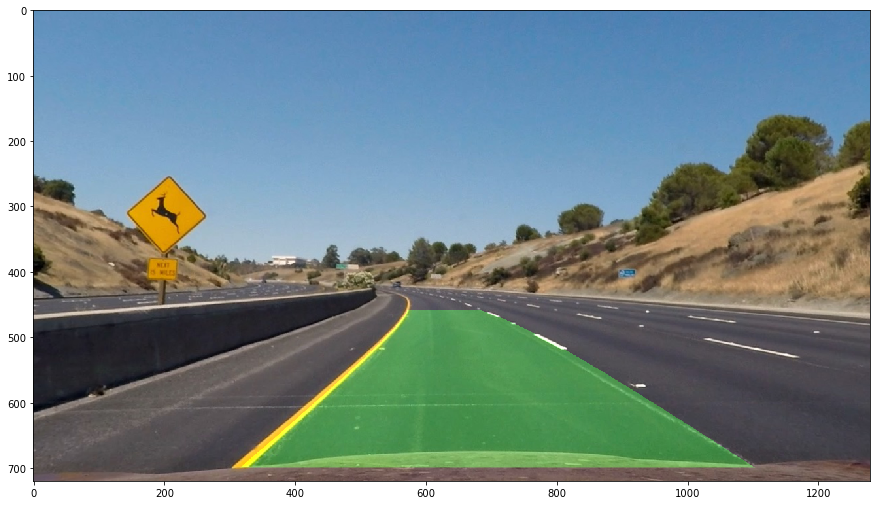

In [7]:
# draw lanes on the original image
output_image = ih.draw_lanes(image, binary_warped_1, left_fitx, right_fitx, ploty, Minv)
plt.figure(figsize=(15,15))
plt.imshow(output_image)

C:\Users\syed.mateen\Documents\snmateen\technical\data science\udacity\carnd\CarND-Advanced-Lane-Lines-master\image_helper.py:313: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  histogram = np.sum(binary_warped[binary_warped.shape[0]/2:,:], axis=0)


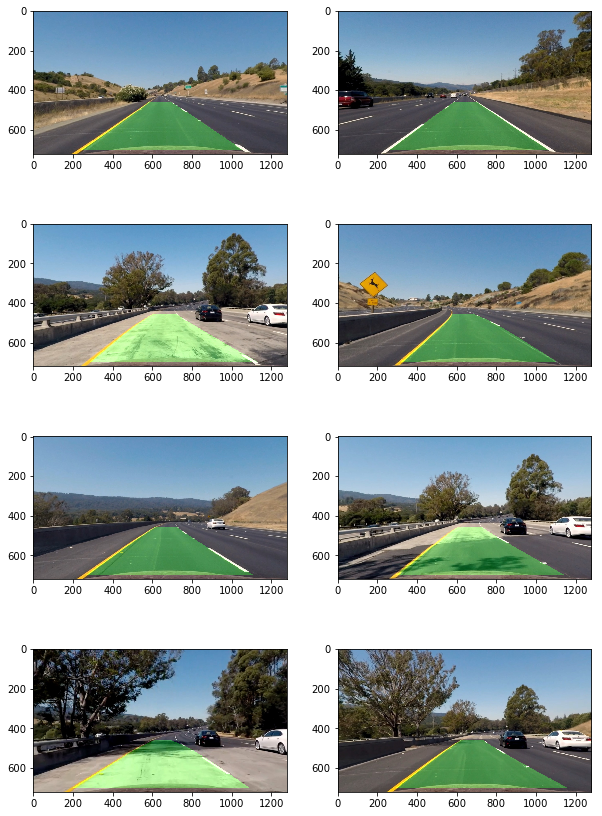

In [8]:
# lets apply this to all the images in "test images" folder
images = glob.glob("./test_images/*.jpg")
plt.figure(figsize=(10,15))
for i, img in zip(range(8), images):
    
    # read image
    image = mpimg.imread(img)
    
    # warp the image after distortion correction
    dst = ih.undistort(image)
    warped, Minv = ih.warp(dst)

    # apply the combined threshold
    binary_warped = ih.combined_threshold(warped,sobel_kernel=3
                                           , sobel_threshold_x_min=50, sobel_threshold_x_max=255
                                           , sobel_threshold_y_min=50, sobel_threshold_y_max=255
                                           , mag_threshold_min=20, mag_threshold_max=255
                                           , dir_threshold_min=-np.pi/2, dir_threshold_max=np.pi/2
                                           , col_threshold_min=150, col_threshold_max=255)
    # fit polynomial
    left_fitx, right_fitx, ploty = ih.fit_polynomial(binary_warped=binary_warped, nwindows=15, plotit=False)
    
    # draw lanes
    output_image = ih.draw_lanes(dst, binary_warped, left_fitx, right_fitx, ploty, Minv)
    
    # save the image in "output_images" folder
    mpimg.imsave("./output_images/" + "lanes_drawn_" + img.split("\\")[-1], output_image)
    
    # plot
    plt.subplot(4,2,i+1)
    plt.imshow(output_image)

In [4]:
import video_helper as vh
from moviepy.editor import VideoFileClip
from IPython.display import HTML

In [2]:
output = 'project_video_output.mp4'
clip2 = VideoFileClip('project_video.mp4')
output_clip = clip2.fl_image(vh.process_image)
%time output_clip.write_videofile(output, audio=False)

[MoviePy] >>>> Building video project_video_output.mp4
[MoviePy] Writing video project_video_output.mp4


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊| 1260/1261 [44:10<00:02,  2.11s/it]


[MoviePy] Done.
[MoviePy] >>>> Video ready: project_video_output.mp4 

Wall time: 44min 11s


In [5]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(output))